In [8]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Suport Vector Machine

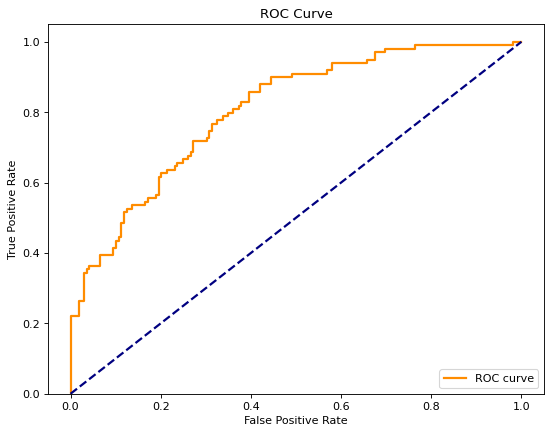

In [12]:
y_true = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_test_svc_linear.npy')
y_pred = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_pred_svc_linear.npy')

fpr, tpr, thresholds = metrics.roc_curve(y_true.reshape(-1), y_pred[:,1])
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

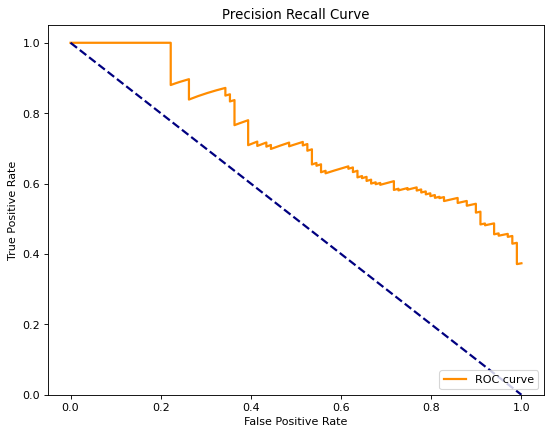

In [48]:
precision, recall, thresholds= metrics.precision_recall_curve(y_true.reshape(-1), y_pred[:,1])
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(recall, precision, color='darkorange', lw=2,label='ROC curve');
plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--');
plt.ylim([0.0, 1.05])
plt.title('Precision Recall Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right");

In [51]:
# metrics.f1_score(y_true, y_pred.argmax(-1))

In [7]:
metrics.confusion_matrix(y_true, y_pred)

array([[153,  16],
       [ 64,  35]])

# Multilayer Perceptron

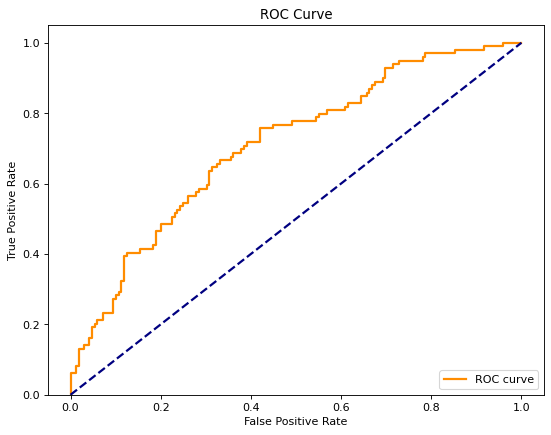

In [52]:
y_true = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_test_mlp.npy')
y_pred = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_pred_mlp.npy')

fpr, tpr, thresholds = metrics.roc_curve(y_true.reshape(-1), y_pred[:,1])
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylim([0.0, 1.05])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

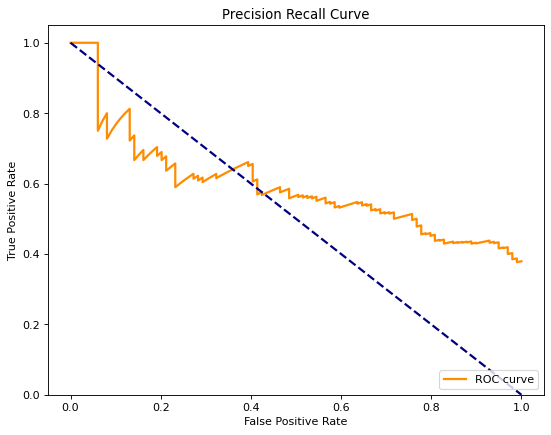

In [53]:
precision, recall, thresholds= metrics.precision_recall_curve(y_true.reshape(-1), y_pred[:,1])
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(recall, precision, color='darkorange', lw=2,label='ROC curve');
plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--');
plt.ylim([0.0, 1.05])
plt.title('Precision Recall Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right");

In [58]:
y =   [  1,   0,   1,   0,   1,   0,   0,   0,   1,   1,   1,   0]
y_prob = [0.8, 0.5, 0.1, 0.3, 0.6, 0.1, 0.4, 0.2, 0.65, 0.9, 0.8, 0.4]

def calculate_pred(y_prob, th):
    return [ 1 if i >= th else 0 for i in y_prob ]

def get_metric(y, y_pred):
    true_positive = 0
    false_negative = 0
    true_negative = 0
    false_positive = 0
    for y_true, y_th in zip(y, y_pred):
        if (y_true == 1) and (y_true == y_th):
            true_positive+=1
        elif (y_true == 1) and (y_true != y_th):
            false_negative+=1
        elif (y_true == 0) and (y_true == y_th):
            true_negative+=1
        elif (y_true == 0) and (y_true != y_th):
            false_positive+=1
    try:
        fpr = false_positive / (false_positive + true_negative)
    except ZeroDivisionError:
        fpr = 0
    try:
        tpr = true_positive / (true_positive + false_negative )
    except ZeroDivisionError:
        tpr = 0
    try:   
        pre = true_positive / (true_positive + false_positive)
    except ZeroDivisionError:
        pre = 0        
    try:   
        recall = true_positive / (true_positive + false_negative)
    except ZeroDivisionError:
        recall = 0        

    return tpr, fpr, pre, recall



In [59]:
y_true = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_test_svc_linear.npy')
y_pred = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_pred_svc_linear.npy')

recall_list = []
prec_list = []
fpr_list = []
tpr_list = []

t_list = [i*0.01 for i in range(100)]
for th in t_list:
    y_prediction = calculate_pred(y_pred[:,1], th)
    tpr, fpr, pre, recall = get_metric(y_true.reshape(-1), y_prediction)
    recall_list.append(recall)
    prec_list.append(pre)
    fpr_list.append(fpr)
    tpr_list.append(tpr)


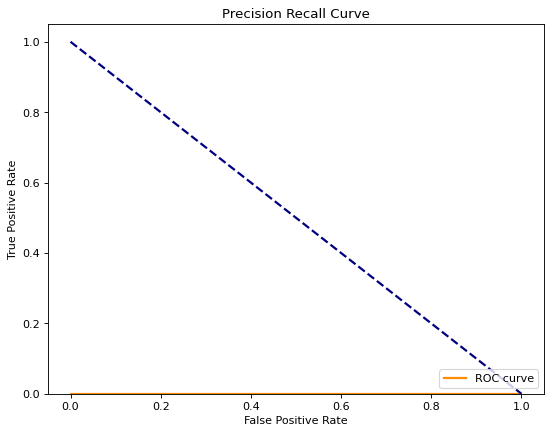

In [60]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot( tpr_list,fpr_list, color='darkorange', lw=2,label='ROC curve');
plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--');
plt.ylim([0.0, 1.05])
plt.title('Precision Recall Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right");

In [70]:
np.unique(y_true_mlp, return_counts=True)

(array([-1,  1], dtype=int64), array([169,  99], dtype=int64))

In [74]:
t = 169 +  99
print(99/t)
print(169/t)

0.3694029850746269
0.6305970149253731


In [75]:
t

268

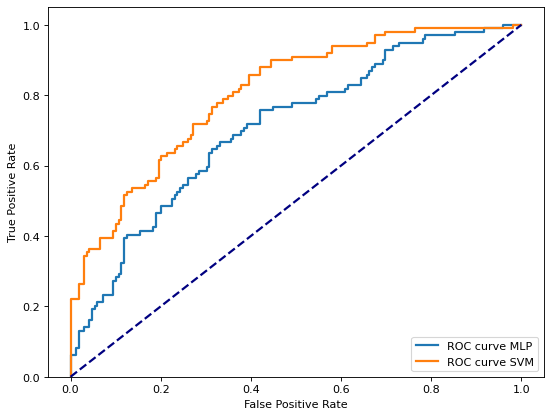

In [78]:
y_true_mlp = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_test_mlp.npy')
y_pred_mlp = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_pred_mlp.npy')
y_true_svm = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_test_svc_linear.npy')
y_pred_svm  = np.load('../dados/Hypercellularity/14.0-predictions_200x200/y_pred_svc_linear.npy')

fpr_svm , tpr_svm , thresholds = metrics.roc_curve(y_true_svm.reshape(-1), y_pred_svm [:,1])
fpr_mlp, tpr_mlp, thresholds = metrics.roc_curve(y_true_mlp.reshape(-1), y_pred_mlp[:,1])

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fpr_mlp, tpr_mlp, lw=2,label='ROC curve MLP')
plt.plot(fpr_svm , tpr_svm , lw=2,label='ROC curve SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylim([0.0, 1.05])
# plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")

In [77]:
len(fpr_svm)

101

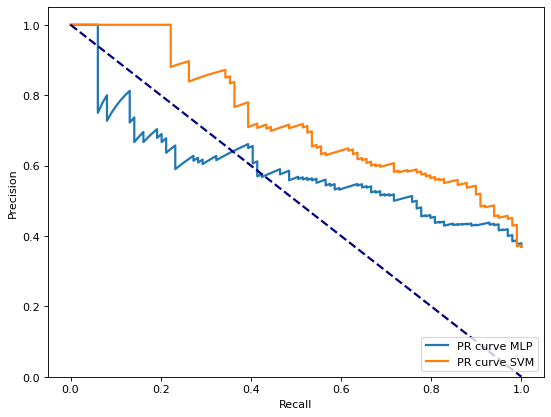

In [79]:
precision_mlp, recall_mlp, thresholds= metrics.precision_recall_curve(y_true_mlp.reshape(-1), y_pred_mlp[:,1])
precision_svm, recall_svm, thresholds= metrics.precision_recall_curve(y_true_svm.reshape(-1), y_pred_svm [:,1])

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(recall_mlp, precision_mlp, lw=2,label='PR curve MLP')
plt.plot(recall_svm,  precision_svm, lw=2,label='PR curve SVM')
plt.plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--');
plt.ylim([0.0, 1.05])

# plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc="lower right");